**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Proyecto Integrador

---

*   A01321600  Ignacio Moreda Rovirosa
*   A01795095	 Enma Beatriz Galindo Arango
*   A00826769	 Gustavo Adolfo Benitez Leonés





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
DIR = "/content/drive/MyDrive/Equipo 39_Proyecto integrador"
os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    "/content/amazon_reviews_us_Health_Personal_Care_v1_00.tsv",
    sep="\t",
    encoding="latin1",
    # nrows=1000,
    on_bad_lines="skip",
    engine="python")
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,650634,R3EQSTM9PWRAL,B0091LBZSU,578484426,Demograss Capsules Diet Pills Lose Weight,Health & Personal Care,3,0,0,N,Y,Three Stars,Only came with 30 pills I wish it would've cam...,2015-08-31
1,US,19827510,RBWPRK17XKIXD,B00PWW3LQ6,456433146,Viva Labs #1 Premium Himalayan Organic Goji Be...,Health & Personal Care,5,0,0,N,Y,A good portable snack,Really yummy and healthy. A good portable snack.,2015-08-31
2,US,1520474,RRSLOAF273XFC,B00DKEWA92,460764511,Whip-it Cleaner,Health & Personal Care,5,1,2,N,Y,You need this,You cannot go wrong with this stuff. I use it ...,2015-08-31
3,US,23905905,R3S8W9Q6SWIT8O,B0015R3A7M,135102038,Optimum Nutrition Opti-Men Daily Multivitamin ...,Health & Personal Care,4,0,0,N,Y,this is a good vitamin for men,This is a good daily vitamin for men.,2015-08-31
4,US,28215779,R3QQ6NSLRVBFJC,B006B8U8BG,200666829,Wet-Stop3 Bedwetting Enuresis Alarm with Loud ...,Health & Personal Care,4,0,0,N,Y,progress is definitely happening!!!!,We have been using this for almost a month and...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308145,US,52339912,R10ITC6DGYFD3J,B00000JHQ7,128840518,Duracell MN1500B8 AA (8-Pack),Health & Personal Care,1,11,46,N,N,"A disappointment, to say the least.",I expected so much and yet recieved so little ...,1999-10-21
5308146,US,51112985,R16BFEO1ITQUP9,B00000JHQ6,131822021,Duracell Coppertop Alkaline Batteries,Health & Personal Care,4,3,4,N,N,Stuff doesn't work without them :),"Duracell is a good brand, and I recomend them ...",1999-09-24
5308147,US,51859493,RJGC0F0GOD6QN,B00000JHQ7,128840518,Duracell MN1500B8 AA (8-Pack),Health & Personal Care,5,8,13,N,N,The best portable source of power I've found y...,These things are absolutely marvelous! Seriou...,1999-08-26
5308148,US,52044246,R2RTO9RPW3E7GE,B00000JHQ5,222843861,"Duracell MN1500B2 AA, (2-Pack)",Health & Personal Care,5,1,8,N,N,The Copper-Top Still Rocks to the Top!,"&quot;The Batteries I use are called Duracell,...",1999-08-07


In [9]:
df.shape

(5308150, 15)

# **Parte 1**. Análisis descriptivo (univariante)

1.1 Resumen de los tipos de datos.
Columnas numéricas y cualitativas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308150 entries, 0 to 5308149
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 607.5+ MB


In [11]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,650634,R3EQSTM9PWRAL,B0091LBZSU,578484426,Demograss Capsules Diet Pills Lose Weight,Health & Personal Care,3,0,0,N,Y,Three Stars,Only came with 30 pills I wish it would've cam...,2015-08-31
1,US,19827510,RBWPRK17XKIXD,B00PWW3LQ6,456433146,Viva Labs #1 Premium Himalayan Organic Goji Be...,Health & Personal Care,5,0,0,N,Y,A good portable snack,Really yummy and healthy. A good portable snack.,2015-08-31
2,US,1520474,RRSLOAF273XFC,B00DKEWA92,460764511,Whip-it Cleaner,Health & Personal Care,5,1,2,N,Y,You need this,You cannot go wrong with this stuff. I use it ...,2015-08-31
3,US,23905905,R3S8W9Q6SWIT8O,B0015R3A7M,135102038,Optimum Nutrition Opti-Men Daily Multivitamin ...,Health & Personal Care,4,0,0,N,Y,this is a good vitamin for men,This is a good daily vitamin for men.,2015-08-31
4,US,28215779,R3QQ6NSLRVBFJC,B006B8U8BG,200666829,Wet-Stop3 Bedwetting Enuresis Alarm with Loud ...,Health & Personal Care,4,0,0,N,Y,progress is definitely happening!!!!,We have been using this for almost a month and...,2015-08-31


1.2 Conteo de Valores Faltantes por Columna

In [13]:
print("Conteo de Valores Faltantes por Columna")
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

Conteo de Valores Faltantes por Columna
marketplace                 0
customer_id                 0
review_id                   0
product_id                  0
product_parent              0
product_title              11
product_category            0
star_rating                 0
helpful_votes               0
total_votes                 0
vine                        0
verified_purchase           0
review_headline            71
review_body               312
review_date                 1
review_year                 1
review_month                1
longitud_resena             0
longitud_titulo_resena      0
ratio_utilidad              0
dtype: int64


In [14]:
print("Porcentaje de Valores Faltantes por Columna")
porcentaje_faltantes = (valores_faltantes / len(df)) * 100
print(porcentaje_faltantes)

Porcentaje de Valores Faltantes por Columna
marketplace               0.000000
customer_id               0.000000
review_id                 0.000000
product_id                0.000000
product_parent            0.000000
product_title             0.000207
product_category          0.000000
star_rating               0.000000
helpful_votes             0.000000
total_votes               0.000000
vine                      0.000000
verified_purchase         0.000000
review_headline           0.001338
review_body               0.005878
review_date               0.000019
review_year               0.000019
review_month              0.000019
longitud_resena           0.000000
longitud_titulo_resena    0.000000
ratio_utilidad            0.000000
dtype: float64


In [42]:
df['review_date'].unique()

array(['2015-08-31'], dtype=object)

El dataset no presenta valores faltantes, lo cual es excelente para el análisis.

1.3. Preprocesamiento y Creación de Nuevas Variables

In [15]:
print("\n--- 1.3. Preprocesamiento y Creación de Nuevas Variables ---")
# Limpieza de faltantes en columnas de texto y fecha, que son críticas
df.dropna(subset=['review_body', 'review_headline', 'product_title', 'review_date'], inplace=True)

df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['review_year'] = df['review_date'].dt.year

# Crear variables numéricas a partir de texto
df['longitud_resena'] = df['review_body'].str.len()
df['longitud_titulo_resena'] = df['review_headline'].str.len()

# Crear una métrica de "utilidad" de la reseña, manejando la división por cero
df['ratio_utilidad'] = np.divide(df['helpful_votes'], df['total_votes'], out=np.zeros_like(df['helpful_votes'], dtype=float), where=df['total_votes']!=0)
print("- 'ano_resena' (int)")


--- 1.3. Preprocesamiento y Creación de Nuevas Variables ---
- 'ano_resena' (int)


## Sección 2: Análisis Univariante

2.1. Análisis de Variables Numéricas

In [16]:
columnas_numericas = ['star_rating', 'helpful_votes', 'total_votes', 'longitud_resena', 'ratio_utilidad']

In [17]:
print("\nEstadísticas Descriptivas:")
print(df[columnas_numericas].describe().T)

print("\nAsimetría y Curtosis:")
print(pd.DataFrame({'Asimetría': df[columnas_numericas].skew(), 'Curtosis': df[columnas_numericas].kurtosis()}))


Estadísticas Descriptivas:
                     count        mean         std  min   25%    50%  \
star_rating      5307756.0    4.161881    1.324094  1.0   4.0    5.0   
helpful_votes    5307756.0    2.304558   22.052461  0.0   0.0    0.0   
total_votes      5307756.0    3.000202   23.686758  0.0   0.0    0.0   
longitud_resena  5307756.0  266.635532  407.990482  1.0  75.0  155.0   
ratio_utilidad   5307756.0    0.326221    0.430250  0.0   0.0    0.0   

                        75%      max  
star_rating        5.000000      5.0  
helpful_votes      1.000000  16401.0  
total_votes        2.000000  17182.0  
longitud_resena  315.000000  47201.0  
ratio_utilidad     0.819672      1.0  

Asimetría y Curtosis:
                  Asimetría       Curtosis
star_rating       -1.428300       0.644666
helpful_votes    233.544508  114232.692046
total_votes      211.229774   99279.970824
longitud_resena   11.711289     481.255906
ratio_utilidad     0.694012      -1.351612



--- Visualización de Distribuciones Numéricas ---


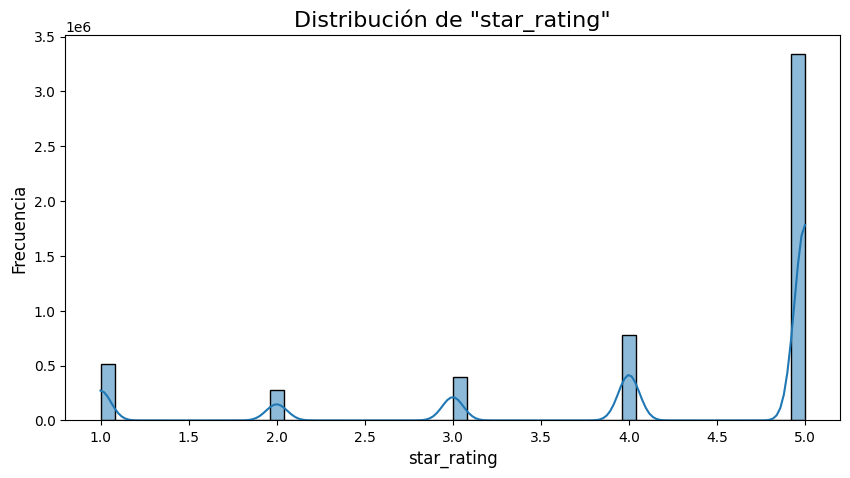

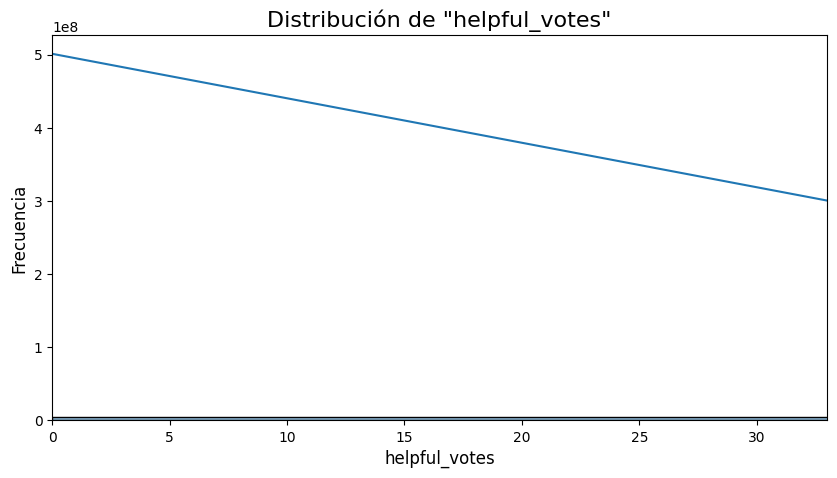

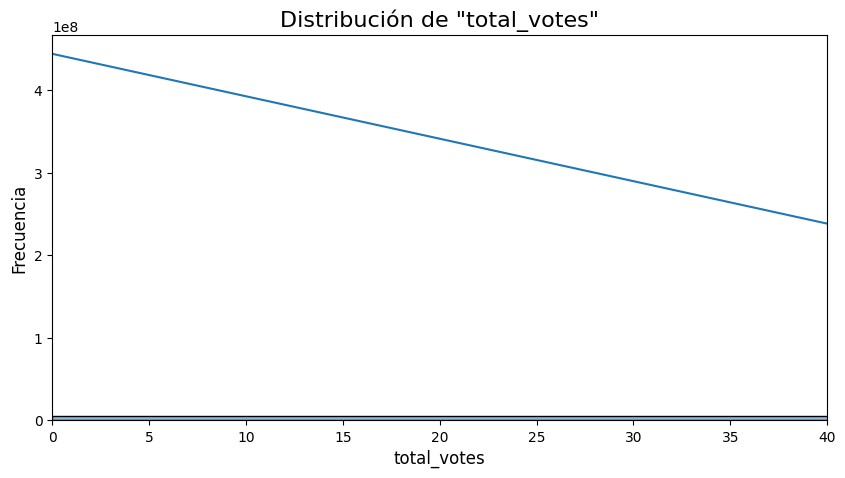

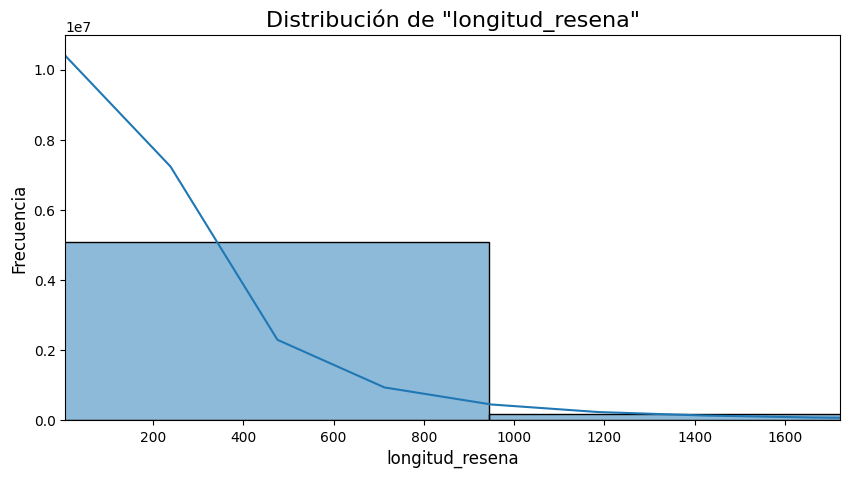

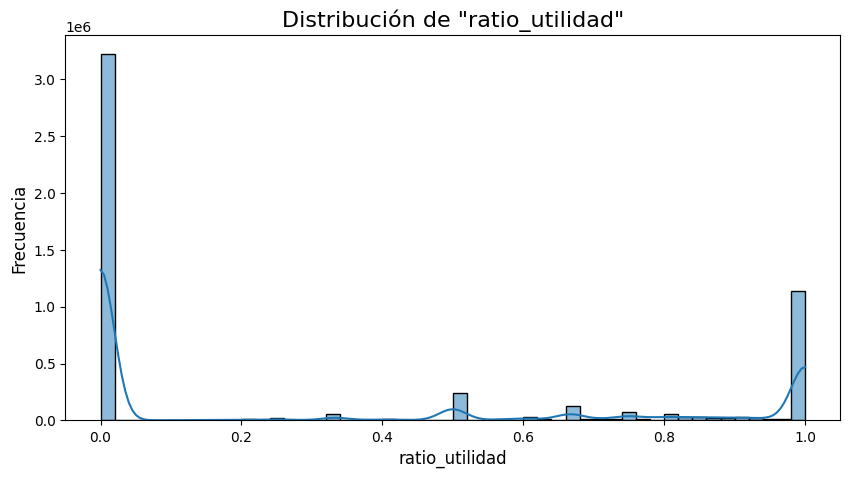

In [18]:
print("\n--- Visualización de Distribuciones Numéricas ---")
for col in columnas_numericas:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribución de "{col}"', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    # Limitar el eje x para variables con outliers extremos para mejor visualización
    if col in ['helpful_votes', 'total_votes', 'longitud_resena']:
        plt.xlim(df[col].quantile(0.01), df[col].quantile(0.99))
    plt.show()


2.2. Análisis de Variables Categóricas

/tmp/ipykernel_276239/4279698785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


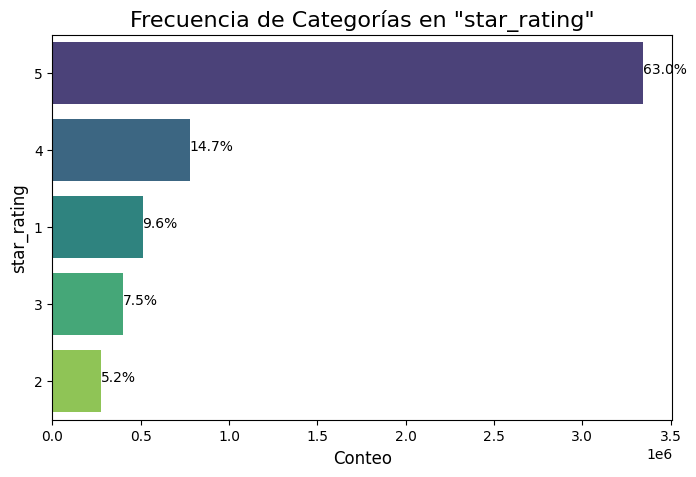

/tmp/ipykernel_276239/4279698785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


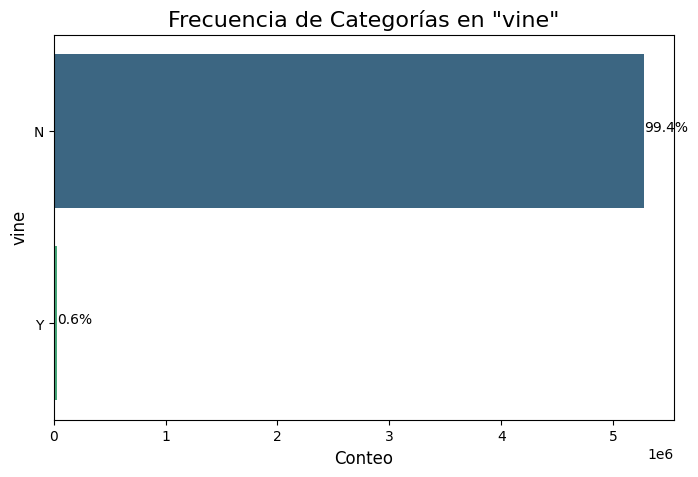

/tmp/ipykernel_276239/4279698785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


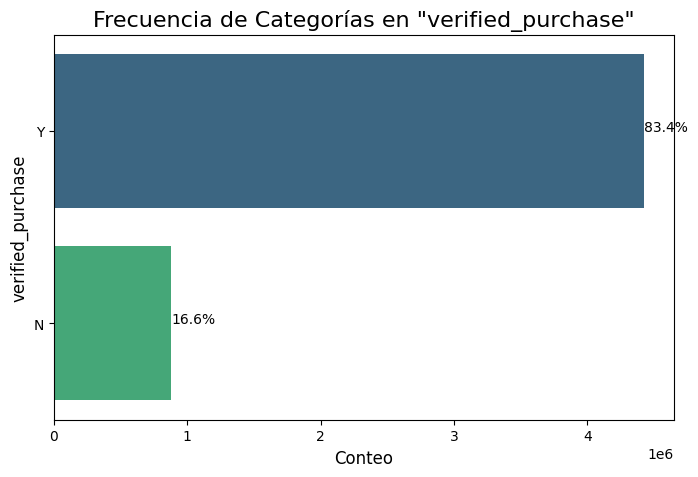

In [19]:
columnas_categoricas_viz = ['star_rating', 'vine', 'verified_purchase']
for col in columnas_categoricas_viz:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frecuencia de Categorías en "{col}"', fontsize=16)
    plt.xlabel('Conteo', fontsize=12)
    plt.ylabel(col, fontsize=12)
    # Añadir porcentajes a las barras
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()

## Sección 3: Análisis Bivariante y Multivariante


--- 3.1. Matriz de Correlación ---


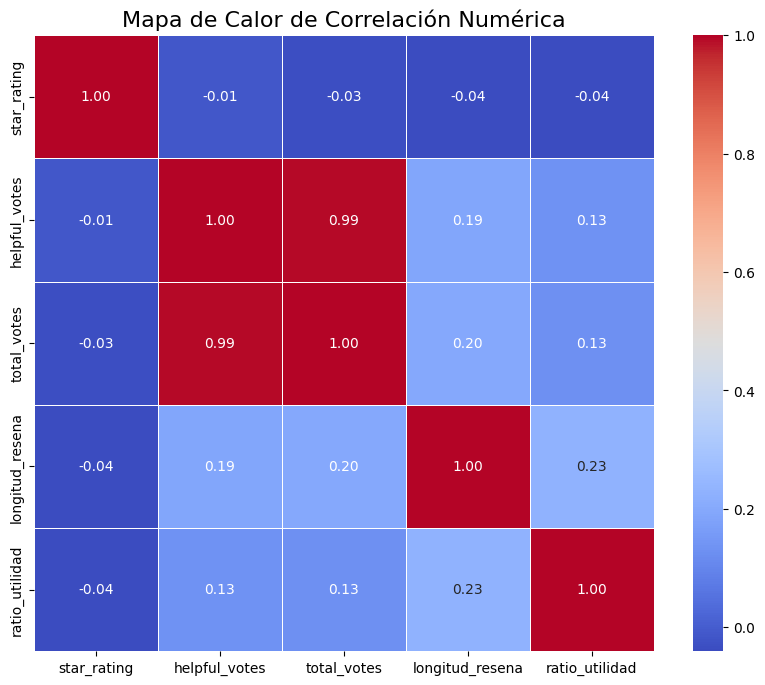

In [20]:
print("\n--- 3.1. Matriz de Correlación ---")
matriz_correlacion = df[columnas_numericas].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación Numérica', fontsize=16)
plt.show()

3.2. Relación entre Variables Categóricas y Numéricas

/tmp/ipykernel_276239/1184974912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='star_rating', y='longitud_resena', data=df, palette='mako', showfliers=False) # showfliers=False para omitir outliers y ver mejor la caja


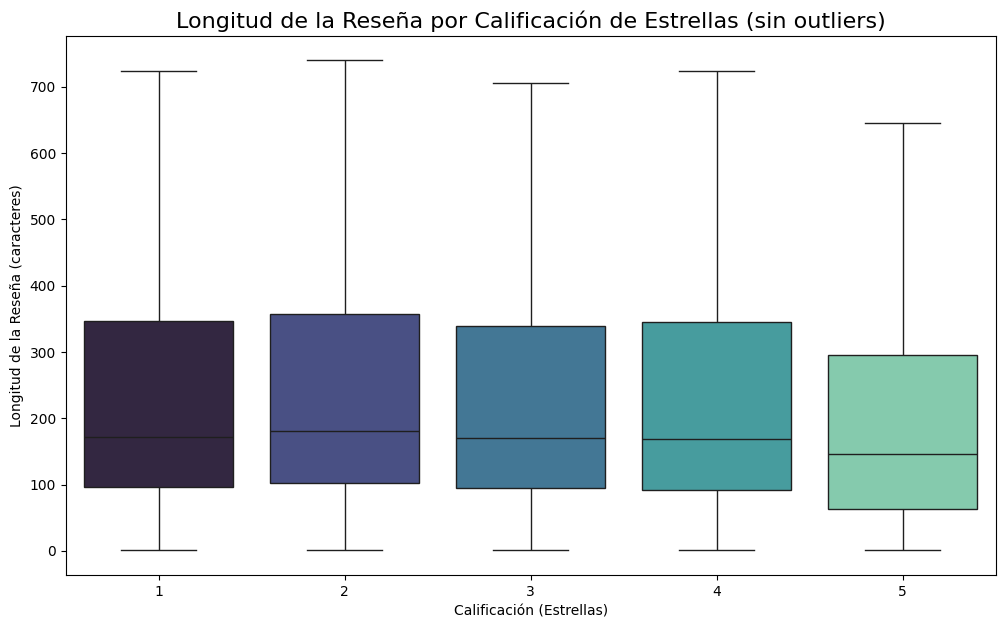

/tmp/ipykernel_276239/1184974912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star_rating', y='helpful_votes', data=df, palette='plasma', estimator=np.mean, errorbar=None)


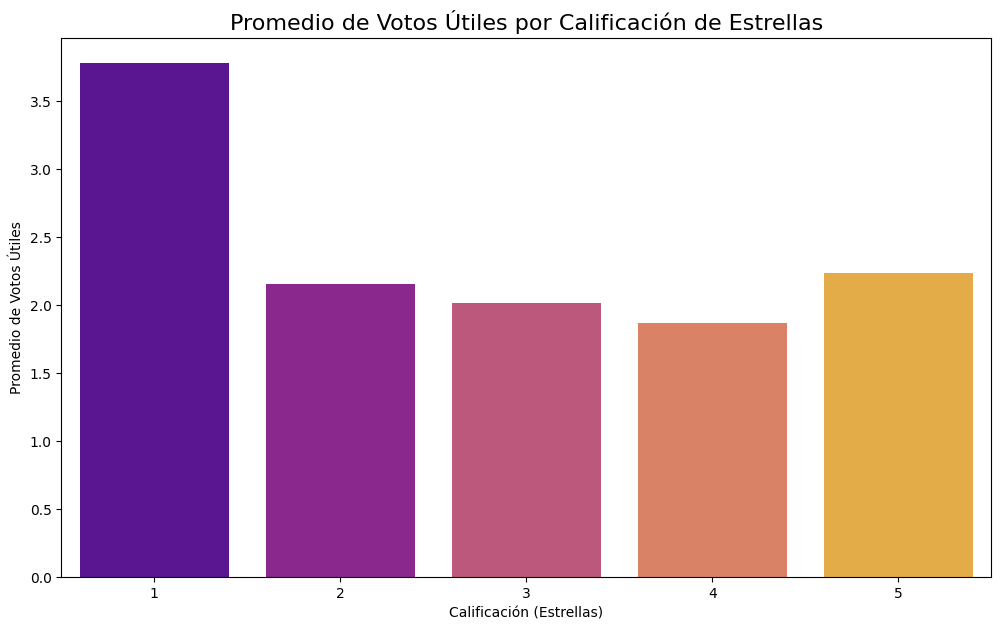

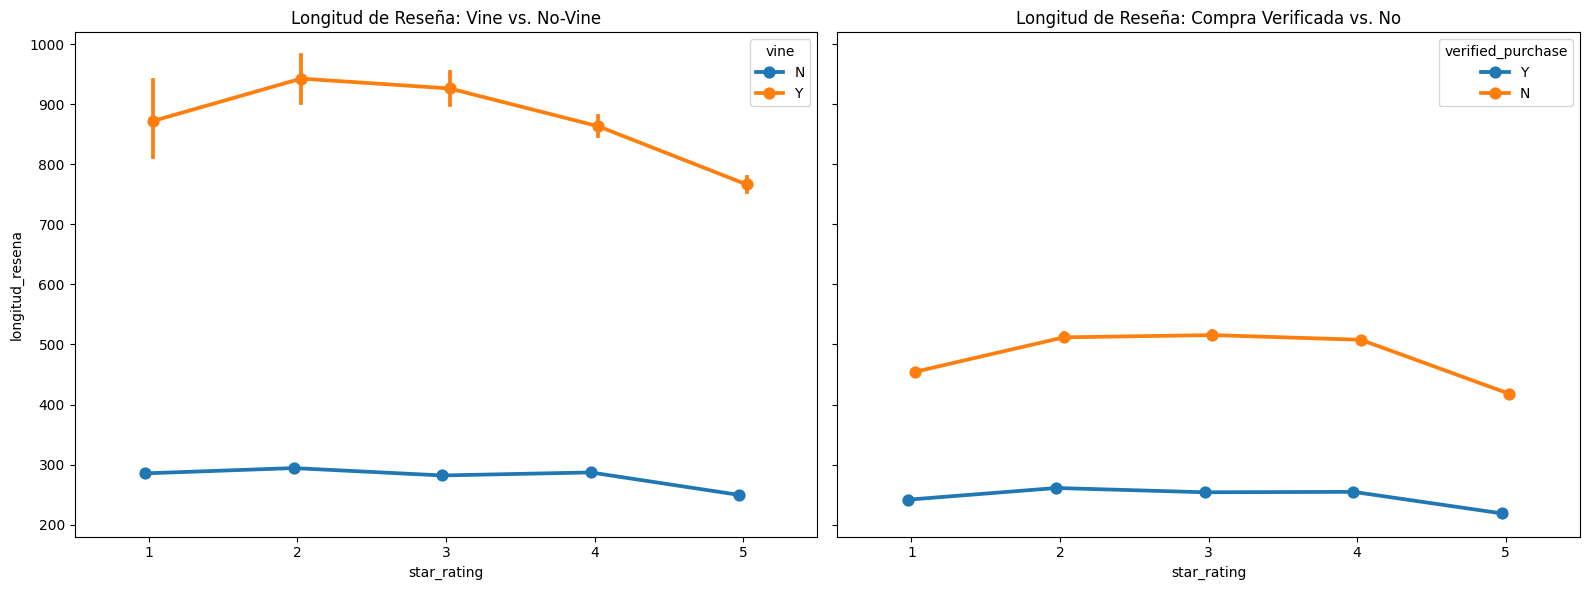

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='star_rating', y='longitud_resena', data=df, palette='mako', showfliers=False) # showfliers=False para omitir outliers y ver mejor la caja
plt.title('Longitud de la Reseña por Calificación de Estrellas (sin outliers)', fontsize=16)
plt.ylabel("Longitud de la Reseña (caracteres)")
plt.xlabel("Calificación (Estrellas)")
plt.show()

# Votos útiles por calificación
plt.figure(figsize=(12, 7))
sns.barplot(x='star_rating', y='helpful_votes', data=df, palette='plasma', estimator=np.mean, errorbar=None)
plt.title('Promedio de Votos Útiles por Calificación de Estrellas', fontsize=16)
plt.ylabel("Promedio de Votos Útiles")
plt.xlabel("Calificación (Estrellas)")
plt.show()

# Comparativa entre programa Vine y compras verificadas
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.pointplot(ax=axes[0], x='star_rating', y='longitud_resena', hue='vine', data=df, dodge=True)
axes[0].set_title('Longitud de Reseña: Vine vs. No-Vine')
sns.pointplot(ax=axes[1], x='star_rating', y='longitud_resena', hue='verified_purchase', data=df, dodge=True)
axes[1].set_title('Longitud de Reseña: Compra Verificada vs. No')
plt.tight_layout()
plt.show()

## Sección 4: Análisis de Tendencias Temporales

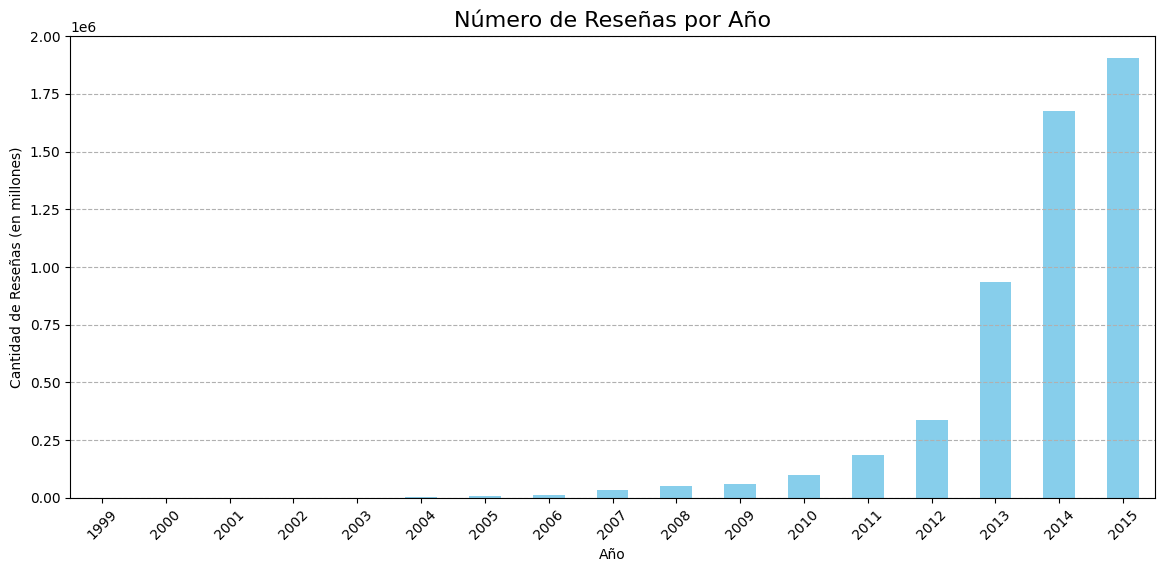

In [22]:
# Número de reseñas a lo largo del tiempo (anual)
resenas_por_ano = df.groupby('review_year').size()
plt.figure(figsize=(14, 6))
resenas_por_ano.plot(kind='bar', color='skyblue')
plt.title('Número de Reseñas por Año', fontsize=16)
plt.ylabel('Cantidad de Reseñas (en millones)')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

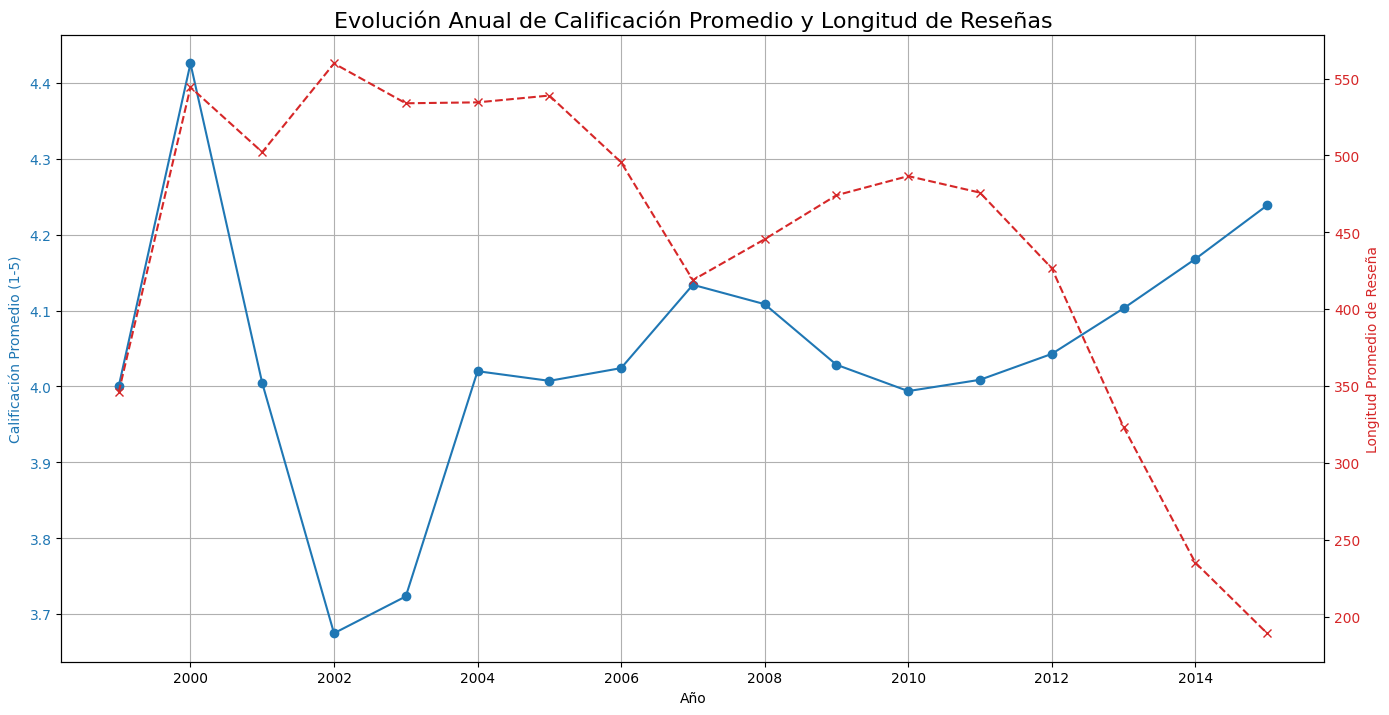

In [23]:
resumen_anual = df.groupby('review_year').agg(
    calificacion_promedio=('star_rating', 'mean'),
    longitud_promedio_resena=('longitud_resena', 'mean')
).sort_index()

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Año')
ax1.set_ylabel('Calificación Promedio (1-5)', color='tab:blue')
ax1.plot(resumen_anual.index, resumen_anual['calificacion_promedio'], color='tab:blue', marker='o', label='Calificación Promedio')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Longitud Promedio de Reseña', color='tab:red')
ax2.plot(resumen_anual.index, resumen_anual['longitud_promedio_resena'], color='tab:red', marker='x', linestyle='--', label='Longitud Promedio')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Evolución Anual de Calificación Promedio y Longitud de Reseñas', fontsize=16)
plt.show()

## Conclusiones

El análisis exploratorio del dataset de reseñas de Amazon ("Health & Personal Care") ha sentado las bases estratégicas para el proyecto Globulive, revelando no solo las características de los datos, sino también el camino a seguir.

1.  El dataset es masivo y de alta calidad, con datos nulos insignificantes. Sin embargo, la señal más importante no reside en la variable `star_rating` por sí sola. El extremo sesgo positivo (78% de reseñas con 4 o 5 estrellas) confirma que un enfoque de clasificación multi-clase sería poco informativo. Esto nos orienta hacia una **simplificación del problema a una clasificación binaria** (reseñas positivas vs. no positivas), que será una de las primeras acciones en la siguiente fase.

2.  Hemos validado que las características más ricas se encuentran en el texto. Las reseñas negativas son, en promedio, más largas y consideradas más "útiles" por la comunidad. Esto demuestra que simplemente usar la calificación de estrellas es insuficiente. Nuestra siguiente fase debe centrarse en la **ingeniería de características (feature engineering)** para cuantificar estas propiedades textuales: mediremos la longitud, el tono (mediante el uso de signos de puntuación) y la complejidad de las reseñas para convertirlas en predictores numéricos.

3.  Se ha detectado una asimetría extrema en variables clave como `helpful_votes`, `total_votes` y `longitud_resena`. Los modelos de machine learning son sensibles a estas distribuciones sesgadas. Por lo tanto, un paso crítico en la preparación de datos será la aplicación de **transformaciones no lineales (como logarítmicas o de potencia)** para normalizar estas variables y estabilizar su varianza.

4.  El análisis temporal mostró un crecimiento exponencial en el volumen de reseñas y una tendencia hacia textos más breves. Esto subraya la importancia de no tratar todas las reseñas por igual. La creación de **características temporales**, como la antigüedad de la reseña (`recency_days`), será fundamental para que el modelo pondere la relevancia de la información a lo largo del tiempo.

**En resumen, este EDA no solo describe los datos, sino que prescribe las acciones para la fase de preparación:** debemos transformar nuestro target, ingeniar características a partir del texto y el comportamiento del usuario, normalizar las distribuciones numéricas y capturar la dinámica temporal. Estas tareas de **preparación, transformación y selección de características** serán el foco de nuestro próximo avance, convirtiendo los datos crudos en un conjunto de features optimizado y listo para el modelado predictivo.